In [102]:
import cmocean.cm as cm
import copy

import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import xarray as xr

In [46]:
ii, jj = 245, 225
ip, jp = 375, 50

In [47]:
jan = xr.open_dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201501_201501_ptrc_T.nc')
jul = xr.open_dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201507_201507_ptrc_T.nc')

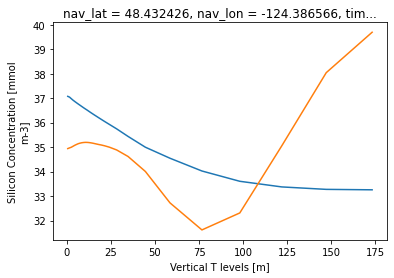

In [50]:
jan.silicon[0, :30, ii, jj].plot()
jan.silicon[0, :30, ip, jp].plot();

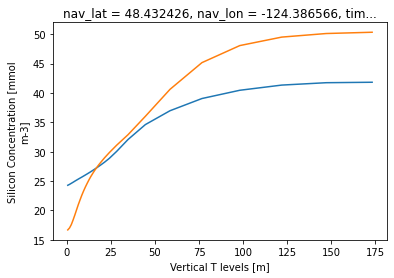

In [51]:
jul.silicon[0, :30, ii, jj].plot()
jul.silicon[0, :30, ip, jp].plot();

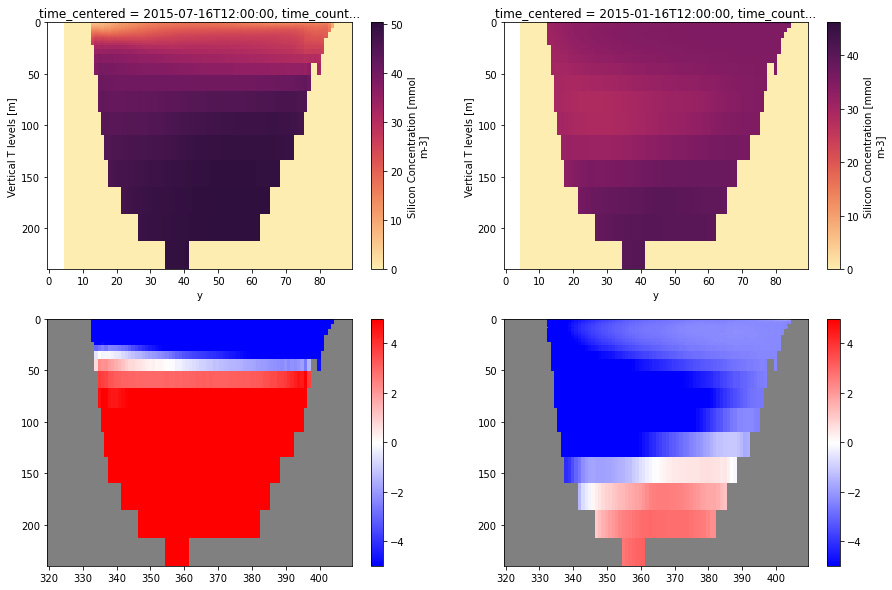

In [87]:
cmap = copy.copy(plt.get_cmap('bwr'))
cmap.set_bad('grey')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
jul.silicon[0, :32, 320:410, jp].plot(ax=axs[0, 0], yincrease=False, cmap=cm.matter);
jan.silicon[0, :32, 320:410, jp].plot(ax=axs[0, 1], yincrease=False, cmap=cm.matter);
july = np.ma.array((jul.silicon[0, :32, 320:410, jp] - 37.5), mask = jul.silicon[0, :32, 320:410, jp] == 0)
colours = axs[1, 0].pcolormesh(np.arange(320, 410), np.array(jul.deptht[:32]), july, vmax=5, vmin=-5, cmap=cmap, shading='auto');
axs[1, 0].invert_yaxis();
fig.colorbar(colours, ax=axs[1, 0])
january = np.ma.array((jan.silicon[0, :32, 320:410, jp] - 37.5), mask = jan.silicon[0, :32, 320:410, jp] == 0)
colours = axs[1, 1].pcolormesh(np.arange(320, 410), np.array(jan.deptht[:32]), january, vmax=5, vmin=-5, cmap=cmap, shading='auto');
axs[1, 1].invert_yaxis();
fig.colorbar(colours, ax=axs[1, 1]);

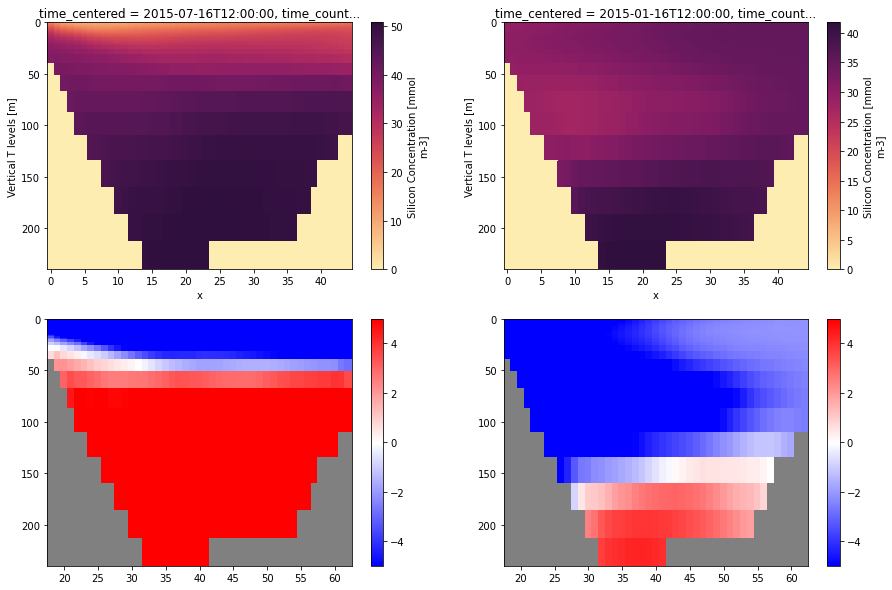

In [95]:
bi = 377
cmap = copy.copy(plt.get_cmap('bwr'))
cmap.set_bad('grey')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
jul.silicon[0, :32, bi, 18:63].plot(ax=axs[0, 0], yincrease=False, cmap=cm.matter);
jan.silicon[0, :32, bi, 18:63].plot(ax=axs[0, 1], yincrease=False, cmap=cm.matter);
july = np.ma.array((jul.silicon[0, :32, bi, 18:63] - 37.5), mask = jul.silicon[0, :32, bi, 18:63] == 0)
colours = axs[1, 0].pcolormesh(np.arange(18, 63), np.array(jul.deptht[:32]), july, vmax=5, vmin=-5, cmap=cmap, shading='auto');
axs[1, 0].invert_yaxis();
fig.colorbar(colours, ax=axs[1, 0])
january = np.ma.array((jan.silicon[0, :32, bi, 18:63] - 37.5), mask = jan.silicon[0, :32, bi, 18:63] == 0)
colours = axs[1, 1].pcolormesh(np.arange(18, 63), np.array(jan.deptht[:32]), january, vmax=5, vmin=-5, cmap=cmap, shading='auto');
axs[1, 1].invert_yaxis();
fig.colorbar(colours, ax=axs[1, 1]);

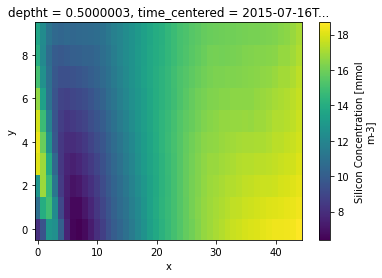

In [94]:
jul.silicon[0, 0, 370:380, 18:63].plot()

In [96]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_Nit_Sil/forward_01'+'jan'+'18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

In [134]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)
m2lon = ((mymesh.glamv[0, 376, 63]-mymesh.glamv[0, 376, 18])/
         (mymesh.e2f[0, 376, 18:63].sum()))

In [97]:
time = 720
transports = mydata.init_transp[(mydata.final_section != 0)]/time

In [139]:
lons = mydata.init_lon[(mydata.final_section != 0)]
dist = lons/m2lon
depths = depthf(mydata.init_z[(mydata.final_section != 0)]-1.)[0]

In [178]:
dist

<xarray.DataArray (ntraj: 28497)>
array([-12158671.22607614, -12157659.67189281, -12157659.67189281, ...,
       -12150723.30034992, -12150217.52325825, -12149205.59663228])
Dimensions without coordinates: ntraj

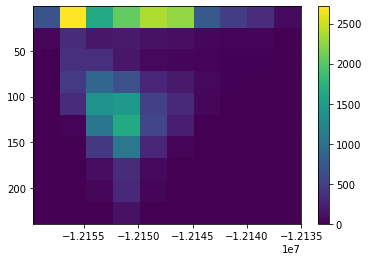

In [140]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths);
fig.colorbar(im)
ax.invert_yaxis();

29715.146397429162 <xarray.DataArray 'init_transp' ()>
array(29715.14639743)


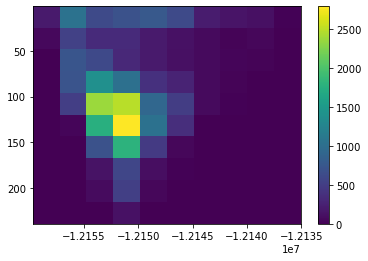

In [167]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports);
print (H.sum(), transports.sum())
fig.colorbar(im)
ax.invert_yaxis();

0.9999999999997901


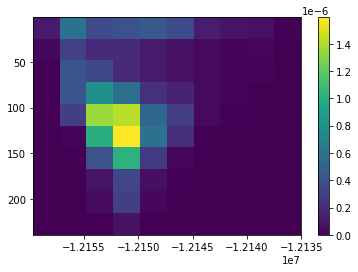

In [181]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports, density=True);
print (H.sum() * (xedges[1] - xedges[0]) * (yedges[1] - yedges[0]))
fig.colorbar(im)
ax.invert_yaxis();

1.69745541304072e-05
0.3938769641626081


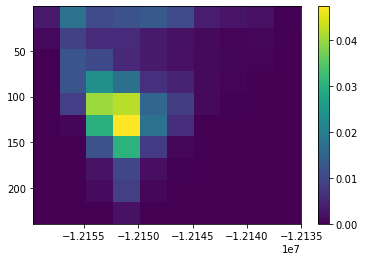

In [165]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports, density=True);
X, Y = np.meshgrid(xedges, yedges)
print (H.sum())
print (H.T[5, 5]/H.T[4, 4])
im = ax.pcolormesh(X, Y, H.T*np.sum(transports).values)
fig.colorbar(im)
ax.invert_yaxis();

In [144]:
tracer = mydata.init_salt[(mydata.final_section != 0)]

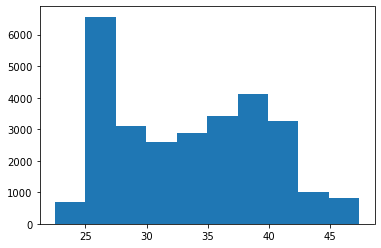

In [145]:
plt.hist(tracer);

1.697455413040726e-05
0.41572798320112453


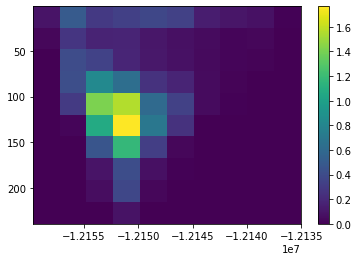

In [163]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports*tracer, density=True);
X, Y = np.meshgrid(xedges, yedges)
print (H.sum())
im = ax.pcolormesh(X, Y, H.T*np.sum(transports*tracer).values)
print (H.T[5, 5]/H.T[4, 4])
fig.colorbar(im)
ax.invert_yaxis();

2468.40077521652 23.86634698226796 29715.14639742917
0.39387696416260815


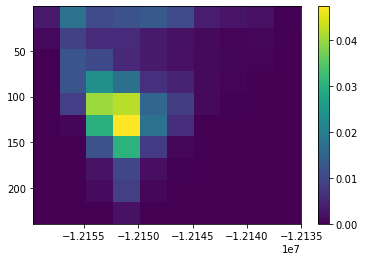

In [187]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports);
X, Y = np.meshgrid(xedges, yedges)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
im = ax.pcolormesh(X, Y, H.T/(dx*dy))
print (H.T[5, 5]/H.T[4, 4])
fig.colorbar(im)
ax.invert_yaxis();

0.4157279832011245


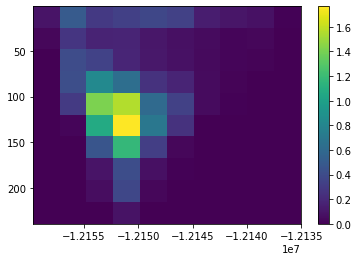

In [189]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports*tracer);
X, Y = np.meshgrid(xedges, yedges)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
im = ax.pcolormesh(X, Y, H.T/(dx*dy))
print (H.T[5, 5]/H.T[4, 4])
fig.colorbar(im)
ax.invert_yaxis();

1.0711537255023373


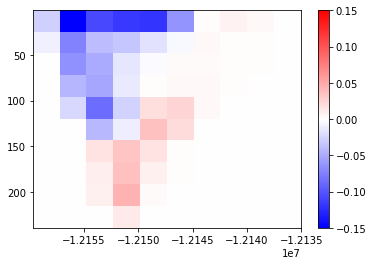

In [193]:
fig, ax = plt.subplots(1, 1)
H, xedges, yedges, im = ax.hist2d(dist, depths, weights=transports*(tracer-37.5));
X, Y = np.meshgrid(xedges, yedges)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
im = ax.pcolormesh(X, Y, H.T/(dx*dy), cmap='bwr', vmax=0.15, vmin=-0.15)
print (H.T[5, 5]/H.T[4, 4])
fig.colorbar(im)
ax.invert_yaxis();